<a href="https://colab.research.google.com/github/Alfian1706/Tugas_2_AVD_221031001/blob/main/Pertemuan_9_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install scikit-learn** bagi yang belum instalasi

In [ ]:
!pip install scikit-learn

Memanggil semua package yang akan digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

Load data set, dengan cara upload terlebih dahulu ke drive google collab

In [ ]:
df = pd.read_csv('drug200.csv')
df.head()

,umur,jk,imt,kolestrol,kandungan,minuman
0,23,F,HIGH,HIGH,25.355,5
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,5


**Lakukan visualisasi data terlebih dahulu untuk mengeksplorasi data**

Hitung jumlah setiap kategori,

*  1: Customer sangat tidak loyal
*  2: Cutomer tidak loyal
*  3: Customer loyal
*  4: Customer sangat loyal


In [ ]:
df['minuman'].value_counts()

,count
minuman,
5,91
4,54
1,23
3,16
2,16


Membuat histogram beberapa variabel bebas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   umur       200 non-null    int64  
 1   jk         200 non-null    object 
 2   imt        200 non-null    object 
 3   kolestrol  200 non-null    object 
 4   kandungan  200 non-null    float64
 5   minuman    200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


array([[<Axes: title={'center': 'minuman'}>]], dtype=object)

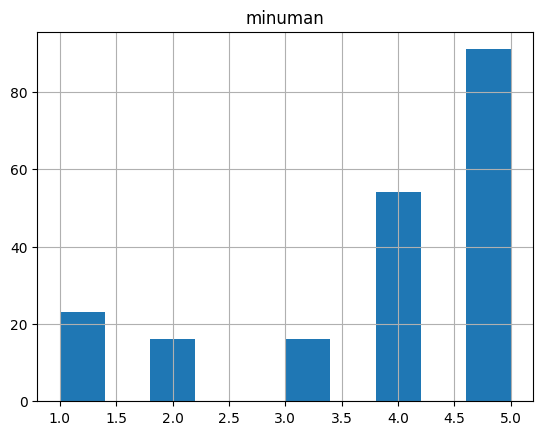

In [ ]:
df.hist(column="minuman",bins=10)

array([[<Axes: title={'center': 'kandungan'}>]], dtype=object)

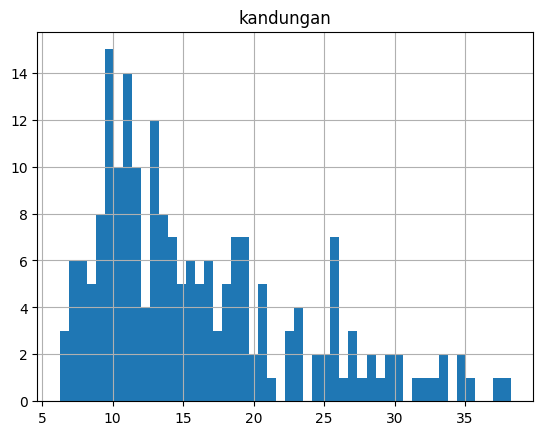

In [ ]:
df.hist(column='kandungan', bins=50)

**Persiapan Data**

*   Membuat kelompok Feature atau variabel bebas tersendiri
*   Membuat kelompok labels atau variabel terikat tersendiri



In [ ]:
df.columns

Index(['umur', 'jk', 'imt', 'kolestrol', 'kandungan', 'minuman'], dtype='object')

In [ ]:
X = df[['umur', 'jk', 'imt', 'kolestrol', 'kandungan', 'minuman']] .values  #.astype(float)
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 5],
       [47, 'M', 'LOW', 'HIGH', 13.093, 3],
       [47, 'M', 'LOW', 'HIGH', 10.114, 3],
       [28, 'F', 'NORMAL', 'HIGH', 7.798, 4],
       [61, 'F', 'LOW', 'HIGH', 18.043, 5]], dtype=object)

In [ ]:
y = df['minuman'].values
y[0:5]

array([5, 3, 3, 4, 5])

Data berbentuk huruf tidak dapat di proses sehingga perlu di transformasi berbentuk numerik

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355, 5],
       [47, 1, 1, 0, 13.093, 3],
       [47, 1, 1, 0, 10.114, 3],
       [28, 0, 2, 0, 7.798, 4],
       [61, 0, 1, 0, 18.043, 5]], dtype=object)

**Lakukan Normalisasi Data**

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212,
         0.82565376],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ,
        -0.63568033],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818,
        -0.63568033],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267,
         0.09498672],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427,
         0.82565376]])

**Membagi data menjadi data training dan testing**

proporsi sebesar 20% data testing, dan 80% data training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 6) (160,)
Test set: (40, 6) (40,)


**Klasifikasi KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**1. Training atau melatih model**

Kita memulai dengan menentukan k=4

In [ ]:
k = 4
#Train Model and Predict
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model_knn

KNeighborsClassifier(n_neighbors=4)

**2. Prediksi data testing**

In [ ]:
yhat = model_knn.predict(X_test)
yhat[0:5]

array([5, 5, 5, 5, 3])

In [ ]:
y_test[0:5]

array([5, 5, 5, 5, 3])

**3. Evaluasi Akurasi Model**

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.96875
Test set Accuracy:  0.875
